<a href="https://colab.research.google.com/github/nurcholisarifhakim/AVD/blob/main/pertemuan_9_KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [4]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv('teleCust1000t.csv')

Saving teleCust1000t.csv to teleCust1000t.csv


In [6]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,daerah,masa_jabatan,umur,perkawinan,alamat,income,pendidikan,pekerjaan,pensiun,jk,tinggal,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [8]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   daerah        1000 non-null   int64
 1   masa_jabatan  1000 non-null   int64
 2   umur          1000 non-null   int64
 3   perkawinan    1000 non-null   int64
 4   alamat        1000 non-null   int64
 5   income        1000 non-null   int64
 6   pendidikan    1000 non-null   int64
 7   pekerjaan     1000 non-null   int64
 8   pensiun       1000 non-null   int64
 9   jk            1000 non-null   int64
 10  tinggal       1000 non-null   int64
 11  custcat       1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


array([[<Axes: title={'center': 'masa_jabatan'}>]], dtype=object)

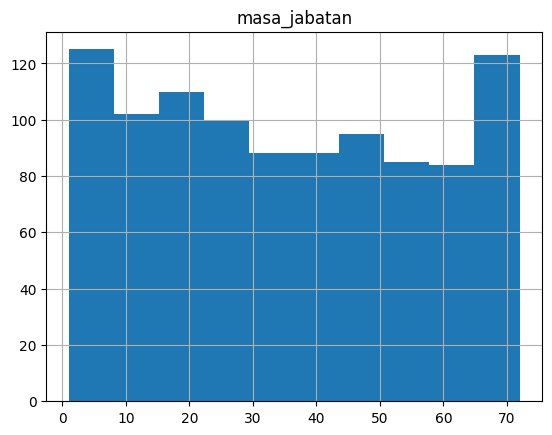

In [10]:
df.hist(column="masa_jabatan",bins=10)

array([[<Axes: title={'center': 'income'}>]], dtype=object)

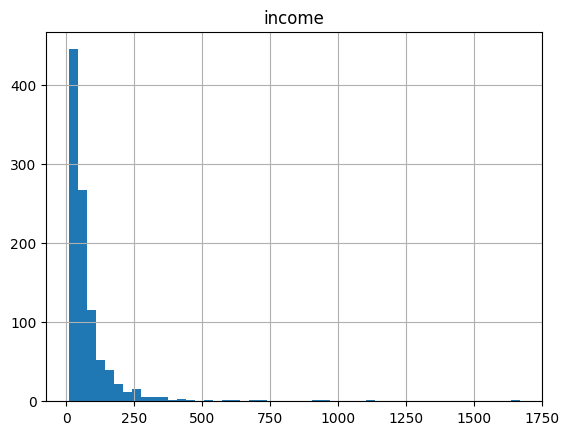

In [11]:
df.hist(column='income', bins=50)

In [12]:

df.columns

Index(['daerah', 'masa_jabatan', 'umur', 'perkawinan', 'alamat', 'income',
       'pendidikan', 'pekerjaan', 'pensiun', 'jk', 'tinggal', 'custcat'],
      dtype='object')

In [13]:

X = df[['daerah', 'masa_jabatan', 'umur', 'perkawinan', 'alamat', 'income','pendidikan', 'pekerjaan', 'pensiun', 'jk', 'tinggal']] .values  #.astype(float)
X[0:5]


array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4]])

In [14]:
y = df['custcat'].values
y[0:5]


array([1, 4, 3, 1, 3])

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k = 4
#Train Model and Predict
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=4)

In [23]:
yhat = model_knn.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [24]:
y_test[0:5]

array([4, 1, 1, 2, 4])

In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train))) # Changed neigh to model_knn
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32
